# Integrantes

* Tomas Acosta Bernal
* Diego Alejandro Castro
* David Felipe Pineda

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import ydata_profiling

# Exploracion Datos

In [2]:
df = pd.read_csv('.\\data/datos_apartamentos_rent.csv',sep=';')


In [28]:
df.select_dtypes(include=[df.columns.tolist()])

TypeError: unhashable type: 'list'

In [3]:
ydata_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]


# Revision de cada columna del diccionario de datos

### ID

id = identificador único del apartamento. Unicamente debe haber un id por fila. Ademas, el id no es necesario para el procesamiento de los datos ya que este valor no va a afectar a la tarea de regresion o clasificacion.

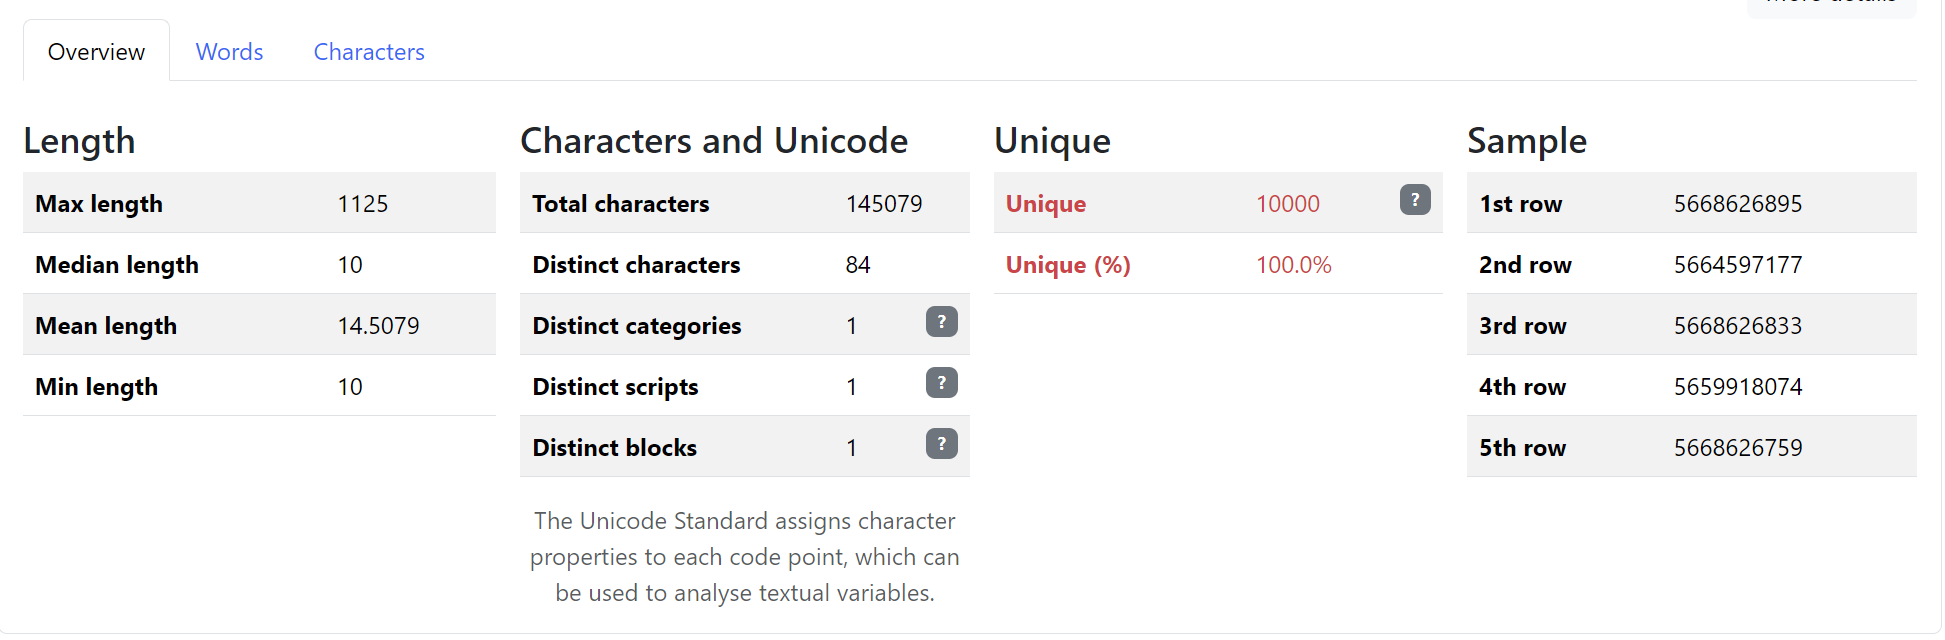

In [4]:
df.drop(columns=['id'],inplace=True)

### Category

podrian tomarse los valores que no pertenezcan a la categoria grande a una nueva categorita ya que son casi despreciables

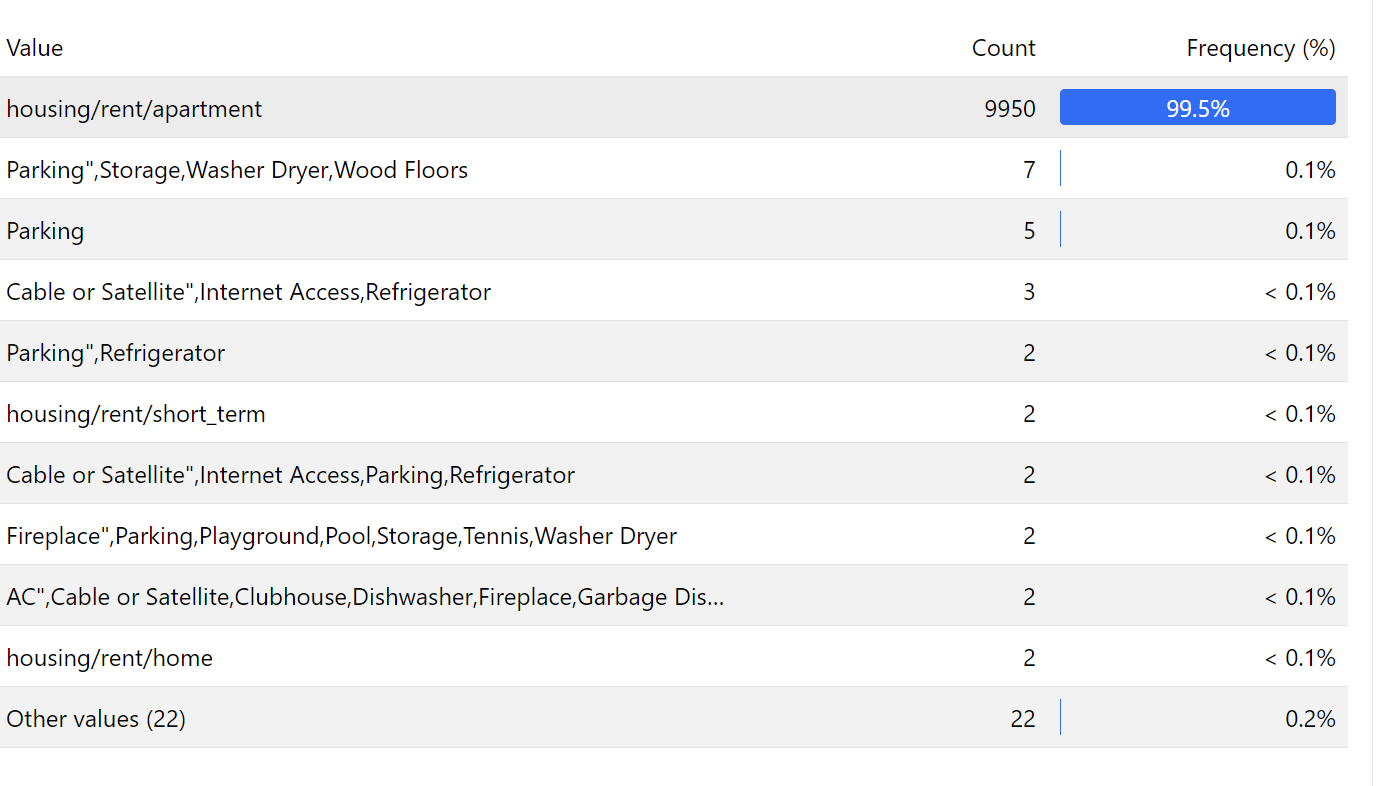

### Title

In [5]:
df['title'].describe()

count                           10000
unique                           9327
top       Apartment in great location
freq                               38
Name: title, dtype: object

Eliminar los valores que son unicamente numeros y no son nada de str.

In [6]:
drop_index = []
for i in range(len(df['title'])):
    try:
        int(df['title'][i])
        print(df['title'][i], i)
        drop_index.append(i)
    except:
        continue

1 206
1 208
1 209
1 211
1 213
1 1217
1 2101
1 2275
1 2381
1 3944
1 4010
1 4365
1 4468
1 4479
1 4553
1 4640
1 4803
1 4999
1 5147
2 5642
1 5841
1 6013
1 6203
1 6204
2 6278
2 6317
2 6323
2 6324
2 6327
2 6329
2 6332
2 6534
1 6703
2 6988
2 7251
2 7495
2 7610
2 7649
2 7688
2 8017
2 8327
2 8362
2 8618
2 8883
2 9557


In [7]:
drop_index = []
for i in range(len(df['title'])):
    try:
        float(df['title'][i])
        print(df['title'][i], i)
        drop_index.append(i)
    except:
        continue

1 206
1 208
1 209
1 211
1 213
1 1217
1 2101
1 2275
1 2381
1 3944
1 4010
1 4365
1 4468
1 4479
1 4553
1 4640
1 4803
1 4999
1 5147
2 5642
1 5841
1 6013
1 6203
1 6204
2 6278
2 6317
2 6323
2 6324
2 6327
2 6329
2 6332
2 6534
1 6703
2 6988
2 7251
2 7495
2 7610
2 7649
2 7688
2 8017
2 8327
2 8362
2 8618
2 8883
2 9557
3.5 9872


In [8]:
df.drop(drop_index, inplace= True)

In [9]:
df.reset_index(inplace=True)

In [10]:
df.drop(columns = ['index'], inplace=True)

eliminar elementos float

In [11]:
drop_index = []
for i in range(len(df['title'])):
    try:
        int(df['title'][i])
        print(df['title'][i], i)
        drop_index.append(i)
    except:
        continue

In [12]:
drop_index = []
for i in range(len(df['title'])):
    if len(df['title'][i]) < 15:
        print(df['title'][i])

One BR Line St
One BR Oak Dr
One BR 1st Ave
One BR Totem
One BR Park St
One BR Cr 25
5115 N 40th St
Dallas Value!
One BR 310 Oak
Gifford Value!
One BR 0
The Rise
715 Madison St
319 S B St 4
Verve
703 Monona Ave
Duplex
Bella Vista
809 Ave G 2
One BR 1 BR
17 W 3rd St 1
Hanover Value!
Hanover Value!
Cary Value!
Rya Suites.
908 8th SW St
400 Dover Cir
9801 E 61st St
6045 N Main St
Two BR 2 BR
Kent Value!
908 8th SW St
The Oasis - B1
Denver Value!
617 Union Ave
Toledo Value!
100 Plum Ave
Two BR Unit A
146 George St
159 West St.
Duplex
Dayton Value!
704 Main St
Mebane Value!
One BR Park Pl
908 8th SW St
Two BR Lincoln
440 Court St 2
Two BR Slape
Cumming Value!
Great Loft


# body

revisar si todos los datos tienen eso o no

In [25]:
cont = 0
not_cont = 0
for i in range(len(df['body'])):
    if 'this unit is located at' in df['body'][i].lower():
        cont += 1
    else:
        not_cont += 1
print(not_cont)

3168
